## Homework 1.3.1 - Pythagorean Problem

Consider three bodies of mass, $m1 = 3$, $m_2 = 4$, and $m_3 = 5$, located coordinate $(x, y)$ at $(1, 3)$, $(-2, -1)$ and $(1, -1)$ respectively. All are initially at rest. The interaction between particles are given by Newton's second law of motion and Newton's gravitational law:

$${{\vec F}_i} = {m_i}{a_i} =  - G\sum\limits_{i \ne j} {{m_i}{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}} $$

Using $G = 4 \pi^2$, investigate the motion of the particles from $t = 0$ to $t = 10$

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio

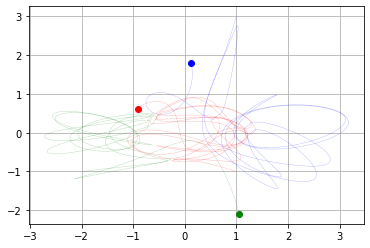

In [2]:
obj1 = {
    "mass": 3,
    "pos": (1, 3),
    "vel": (0, 0)
}
obj2 = {
    "mass": 4,
    "pos": (-2, -1),
    "vel": (0, 0)
}
obj3 = {
    "mass": 5,
    "pos": (1, -1),
    "vel": (0, 0)
}
init = [obj1, obj2, obj3]

G = 4 * np.pi
n = len(init)


def dx(u, i, j):
    m = init[j]['mass']
    x1 = u[i]
    y1 = u[i + n]
    x2 = u[j]
    y2 = u[j + n]
    return m * (x2-x1) / np.linalg.norm([x2-x1, y2-y1])**3


def dy(u, i, j):
    m = init[j]['mass']
    x1 = u[i]
    y1 = u[i + n]
    x2 = u[j]
    y2 = u[j + n]
    return m * (y2-y1) / np.linalg.norm([x2-x1, y2-y1])**3


def ddx(u, i):
    other_indices = list(range(n))
    other_indices.remove(i)  # remove i == j
    return G * sum([dx(u, i, j) for j in other_indices])


def ddy(u, i):
    other_indices = list(range(n))
    other_indices.remove(i)  # remove i == j
    return G * sum([dy(u, i, j) for j in other_indices])


def rhs(u, t):
    vx = u[2*n:3*n]
    vy = u[3*n:4*n]
    ax = [ddx(u, i) for i in range(n)]
    ay = [ddy(u, i) for i in range(n)]
    return np.concatenate((vx, vy, ax, ay))


xs = [obj['pos'][0] for obj in init]
ys = [obj['pos'][1] for obj in init]
vxs = [obj['vel'][0] for obj in init]
vys = [obj['vel'][1] for obj in init]
y_0 = np.concatenate((xs, ys, vxs, vys))

t = np.linspace(0, 10, 1000)
vec = odeint(rhs, y_0, t)


def plotter(k=0):
    # plot first object
    plt.plot(vec[:, 0], vec[:, n+0], 'b', linewidth=0.4, alpha=0.3)
    plt.plot(vec[k, 0], vec[k, n+0], 'bo')
    # plot second object
    plt.plot(vec[:, 1], vec[:, n+1], 'g', linewidth=0.4, alpha=0.3)
    plt.plot(vec[k, 1], vec[k, n+1], 'go')
    # plot thrid object
    plt.plot(vec[:, 2], vec[:, n+2], 'r', linewidth=0.4, alpha=0.3)
    plt.plot(vec[k, 2], vec[k, n+2], 'ro')
    # plot settings
    plt.grid()


plotter(999)

In [3]:
def gifMaker():
    frames = []
    for i in range(1000):
        plotter(i)
        # create file name and append it to a list
        frame = f'{i}.png'
        frames.append(frame)

        # save frame
        plt.savefig(frame)
        plt.close()
    # build gif
    with imageio.get_writer('3-bodt-realtime.gif', mode='I') as writer:
        for frame in frames:
            image = imageio.imread(frame)
            writer.append_data(image)

    # Remove files
    for filename in set(frames):
        os.remove(filename)
# gifMaker()

<h3>Real Time</h3>

<img src="3-body-realtime.gif">

<h3>Fast Foward</h3>

<img src="3-body-fast-foward.gif">

___
## Homework 1.3.2 - Double Pendulum
![alt text](images/double-pendulum.png "Double Pendulum")

The equations of motion for the double pendulum are given by [wolfram](http://scienceworld.wolfram.com/physics/DoublePendulum.html):

$$({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) + ({m_1} + {m_2})g\sin {\theta _1} = 0$$

$${m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) - {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) + {m_2}g\sin {\theta _2} = 0$$

Given that $l_1 = 1$, $l_2 = 2$, $m_1 = 1$, $m_2 = 2$ and $g = 9.8$ $m/s^2$

The initial conditions at $t = 0$ are:

${{\theta }_1}(0) = 1.5$

${{\dot \theta }_1}(0) = 0$

${{\theta }_2}(0) = 3.0$

${{\dot \theta }_2}(0) = 0.0$

Write a program to plots the positions of the mass $m_2$ in $x-y$ coordinate over the time interval $0 \le t \le T\; s$. Where $T$ are:

a) 10

b) 100

Got equation from [here](https://freddie.witherden.org/tools/doublependulum/report.pdf)

$$
\begin{align}
\theta_1' &= \omega_1 \\
\omega_1 ' &= \frac{m_2 l_1 \omega_1^2 \sin\Delta \cos\Delta+m_2 g \sin\theta_2 \cos\Delta + m_2 l_2 \omega_2^2 \sin\Delta 
- Mgsin\theta_1}{Ml_1 - m_2 l_1 \cos^2\Delta} \\
\theta_2' &= \omega_2 \\
\omega_2 ' &= \frac{-m_2 l_2 \omega_2^2 \sin\Delta \cos\Delta +
M(g \sin\theta_1 \cos\Delta - l_1 \omega_1^2 \sin\Delta - gsin\theta_1)}{Ml_2 - m_2 l_2 \cos^2\Delta}
\end{align}
$$
where,

$$
\begin{align}
\Delta &= \theta_2 - \theta_1 \\
M &= m_1 + m_2
\end{align}
$$

In [4]:
def pol2cart(l, theta):
    a = l * np.exp(1j * (theta - np.pi/2))
    x, y = a.real, a.imag
    return x, y

In [5]:
theta_1 = 1.5
theta_2 = 3.
dtheta_1 = 0.
dtheta_2 = 0.
init = [theta_1, theta_2, dtheta_1, dtheta_2]

l1 = 1
l2 = 2
m1 = 2
m2 = 1
g = 9.8

def func(y, t):  # define vector f(y,t)
    theta_1, theta_2, dtheta_1, dtheta_2 = y
    delta = theta_2 - theta_1
    M = m1 + m2
    
    # ddtheta_1
    ddtheta_1_1 = m2*l1*(dtheta_1**2)*np.sin(delta)*np.cos(delta)
    ddtheta_1_2 = m2*g*np.sin(theta_2)*np.cos(delta)
    ddtheta_1_3 = m2*l2*(dtheta_2**2)*np.sin(delta)
    ddtheta_1_4 = M*g*np.sin(theta_1)
    ddtheta_1_5 = M*l1
    ddtheta_1_6 = m2*l1*(np.cos(delta)**2)
    ddtheta_1 = (ddtheta_1_1 + ddtheta_1_2 + ddtheta_1_3 -
                 ddtheta_1_4) / (ddtheta_1_5 - ddtheta_1_6)
    
    # ddtheta_2
    ddtheta_2_1 = m2*l2*(dtheta_2**2)*np.sin(delta)*np.cos(delta)
    ddtheta_2_2 = M*(g*np.sin(theta_1)*np.cos(delta) - l1 *
                     (dtheta_1**2)*np.sin(delta) - g*np.sin(theta_2))
    ddtheta_2_3 = M*l2
    ddtheta_2_4 = m2*l2*(np.cos(delta)**2)
    ddtheta_2 = ((-1*ddtheta_2_1) + ddtheta_2_2) / (ddtheta_2_3 - ddtheta_2_4)
    return [dtheta_1, dtheta_2, ddtheta_1, ddtheta_2]

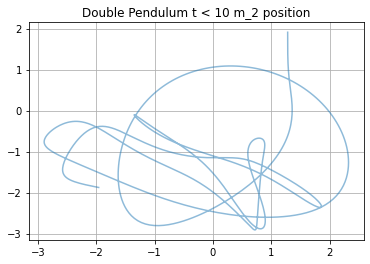

In [6]:
t = np.arange(0, 10, 0.01)
vec = odeint(func, init, t)
theta_1 = vec[:, 0]
theta_2 = vec[:, 1]
dtheta_1 = vec[:, 2]
dtheta_2 = vec[:, 3]

pos_x1, pos_y1 = pol2cart(l1, theta_1)
pos_x2, pos_y2 = pol2cart(l2, theta_2)
pos_x = pos_x1 + pos_x2
pos_y = pos_y1 + pos_y2
plt.plot(pos_x, pos_y, alpha=0.5)
plt.title('Double Pendulum t < 10 m_2 position')
plt.grid()
plt.show()

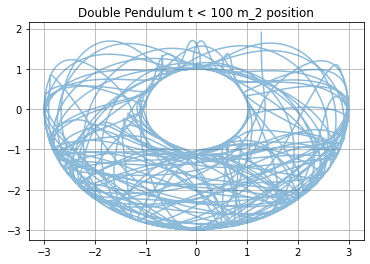

In [7]:
t = np.arange(0, 100, 0.01)
vec = odeint(func, init, t)
theta_1 = vec[:, 0]
theta_2 = vec[:, 1]
dtheta_1 = vec[:, 2]
dtheta_2 = vec[:, 3]

pos_x1, pos_y1 = pol2cart(l1, theta_1)
pos_x2, pos_y2 = pol2cart(l2, theta_2)
pos_x = pos_x1 + pos_x2
pos_y = pos_y1 + pos_y2
plt.plot(pos_x, pos_y, alpha=0.5)
plt.title('Double Pendulum t < 100 m_2 position')
plt.grid()
plt.show()